In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


drive.mount('/content/drive'): This line mounts  Google Drive to the /content/drive directory within the Colab environment. This step is necessary if we want to access files or directories stored in  Google Drive from  Colab notebook.

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
image = cv2.imread('/content/clock2.jpg', cv2.IMREAD_GRAYSCALE)

image = cv2.imread('/content/clock2.jpg', cv2.IMREAD_GRAYSCALE): This line reads the image file "clock2.jpg" located in the "/content" directory using OpenCV's imread function. The second argument, cv2.IMREAD_GRAYSCALE, specifies that the image should be read in grayscale format, which means the resulting image will have only one channel (black and white) instead of three channels (RGB) as a color image would have.

In [3]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(5,5))
print("Kernel for Morphological Transformations")
print(kernel)

Kernel for Morphological Transformations
[[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]


kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5)): This line creates a kernel using the cv2.getStructuringElement function. The function takes two arguments:

cv2.MORPH_RECT: This argument specifies the shape of the kernel. In this case, cv2.MORPH_RECT indicates that the kernel should be a rectangular shape.

(5, 5): This tuple specifies the size of the kernel. In this case, the kernel will have a size of 5x5 pixels, meaning it will have 5 rows and 5 columns.

print("Kernel for Morphological Transformations"): This line simply prints a message indicating that the following output will show the kernel used for morphological transformations.

print(kernel): This line prints the actual kernel matrix that was created using cv2.getStructuringElement. The kernel matrix will be a 5x5 matrix filled with ones, as it represents a 5x5 rectangular shape. The kernel matrix is used in various morphological operations, such as dilation and erosion, to process images by modifying their shapes and structures.

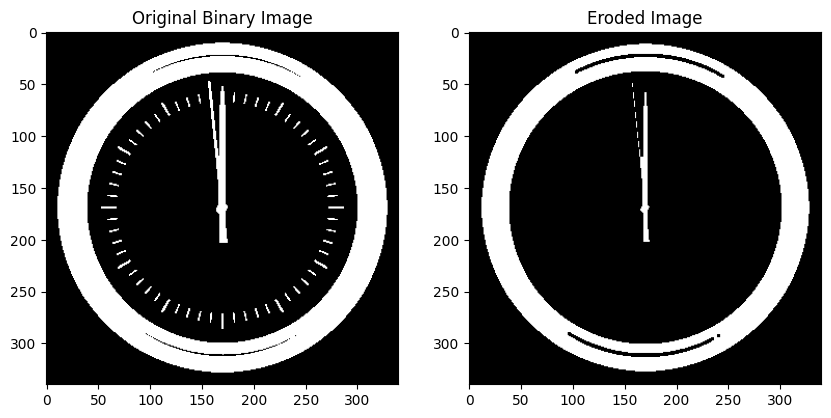

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def erode_image(binary_image, kernel):
    rows, cols = binary_image.shape
    kernel_size = kernel.shape[0]
    offset = kernel_size // 2
    eroded_image = np.zeros_like(binary_image)

    for i in range(offset, rows - offset):
        for j in range(offset, cols - offset):
            if np.all(binary_image[i - offset:i + offset + 1, j - offset:j + offset + 1] == 255):
                eroded_image[i, j] = 255

    return eroded_image


image = cv2.imread('/content/clock2.jpg')
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


_, binary_image = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)


kernel = np.ones((3, 3), np.uint8)


eroded_image = erode_image(binary_image, kernel)


plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(binary_image, cmap='gray')
plt.title('Original Binary Image')

plt.subplot(1, 2, 2)
plt.imshow(eroded_image, cmap='gray')
plt.title('Eroded Image')

plt.show()


def erode_image(binary_image, kernel): This line defines a function named erode_image that takes two parameters: binary_image (the binary image on which erosion will be performed) and kernel (the structuring element used for erosion).

rows, cols = binary_image.shape: This line determines the number of rows and columns in the binary_image using the shape attribute of NumPy arrays.

kernel_size = kernel.shape[0]: This line calculates the size of the kernel, assuming that the kernel is a square matrix, so its size is the number of rows or columns it has.

offset = kernel_size // 2: This line calculates the offset from the center of the kernel. It is used to ensure that erosion is applied to the image only where the kernel can be fully placed without exceeding its boundaries.

eroded_image = np.zeros_like(binary_image): This line creates a new array called eroded_image, which will store the result of the erosion operation. It is initialized with zeros and has the same shape as the binary_image.

The following nested loops iterate over the pixels of the binary_image starting from offset and ending at rows - offset and cols - offset, respectively. This ensures that the kernel can be fully placed at each pixel position without going out of bounds.

if np.all(binary_image[i - offset:i + offset + 1, j - offset:j + offset + 1] == 255): This line checks if all the pixels within the kernel window have a value of 255 (white). If all the pixels are white, then the center pixel at position (i, j) in the eroded_image is set to 255 (white), indicating that the erosion operation has successfully eroded that particular region.

return eroded_image: After the nested loops are completed, the function returns the eroded_image.

The rest of the code loads an image, converts it to grayscale (gray_image), converts it to a binary image (binary_image) using thresholding, creates a 3x3 kernel using np.ones, and then calls the erode_image function with the binary image and the created kernel as arguments to obtain the eroded_image.

The result of the erosion operation is stored in the eroded_image variable, which will contain a binary image with areas eroded based on the given kernel.

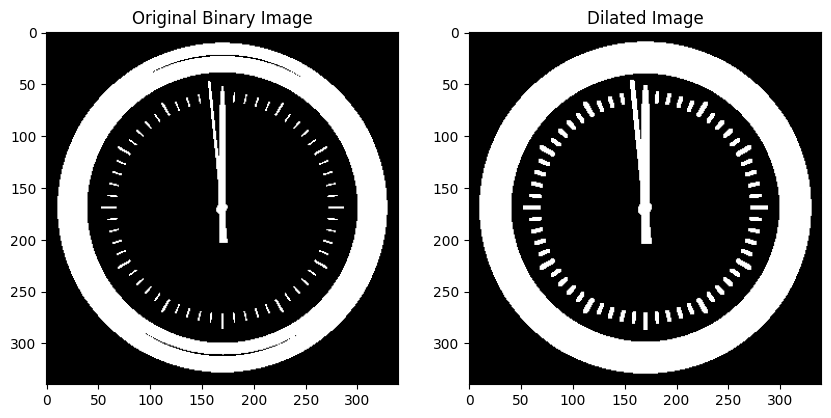

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def dilate_image(binary_image, kernel):
    rows, cols = binary_image.shape
    kernel_size = kernel.shape[0]
    offset = kernel_size // 2
    dilated_image = np.zeros_like(binary_image)

    for i in range(offset, rows - offset):
        for j in range(offset, cols - offset):
            if binary_image[i, j] == 255:  # Check if the pixel is part of the foreground
                dilated_image[i - offset:i + offset + 1, j - offset:j + offset + 1] = 255

    return dilated_image


image = cv2.imread('/content/clock2.jpg')
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


_, binary_image = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)


kernel = np.ones((3, 3), np.uint8)


dilated_image = dilate_image(binary_image, kernel)


plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(binary_image, cmap='gray')
plt.title('Original Binary Image')

plt.subplot(1, 2, 2)
plt.imshow(dilated_image, cmap='gray')
plt.title('Dilated Image')

plt.show()


def dilate_image(binary_image, kernel): This line defines a function named dilate_image that takes two parameters: binary_image (the binary image on which dilation will be performed) and kernel (the structuring element used for dilation).

rows, cols = binary_image.shape: This line determines the number of rows and columns in the binary_image using the shape attribute of NumPy arrays.

kernel_size = kernel.shape[0]: This line calculates the size of the kernel, assuming that the kernel is a square matrix, so its size is the number of rows or columns it has.

offset = kernel_size // 2: This line calculates the offset from the center of the kernel. It is used to ensure that dilation is applied to the image only where the kernel can be fully placed without exceeding its boundaries.

dilated_image = np.zeros_like(binary_image): This line creates a new array called dilated_image, which will store the result of the dilation operation. It is initialized with zeros and has the same shape as the binary_image.

The following nested loops iterate over the pixels of the binary_image starting from offset and ending at rows - offset and cols - offset, respectively. This ensures that the kernel can be fully placed at each pixel position without going out of bounds.

if binary_image[i, j] == 255:: This line checks if the pixel at position (i, j) in the binary_image is part of the foreground (white pixel). If it is, then the entire kernel window around that pixel in the dilated_image is set to 255 (white), indicating that the dilation operation has successfully expanded the foreground.

return dilated_image: After the nested loops are completed, the function returns the dilated_image.

The rest of the code loads an image, converts it to grayscale (gray_image), converts it to a binary image (binary_image) using thresholding, creates a 3x3 kernel using np.ones, and then calls the dilate_image function with the binary image and the created kernel as arguments to obtain the dilated_image.

The result of the dilation operation is stored in the dilated_image variable, which will contain a binary image with areas dilated based on the given kernel.

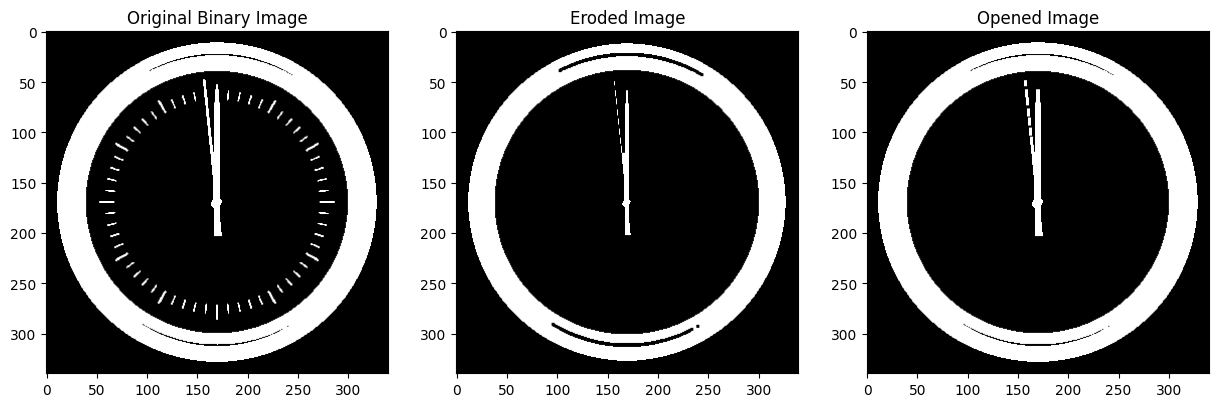

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def erode_image(binary_image, kernel):
    rows, cols = binary_image.shape
    kernel_size = kernel.shape[0]
    offset = kernel_size // 2
    eroded_image = np.zeros_like(binary_image)

    for i in range(offset, rows - offset):
        for j in range(offset, cols - offset):
            if np.all(binary_image[i - offset:i + offset + 1, j - offset:j + offset + 1] == 255):
                eroded_image[i, j] = 255

    return eroded_image

def dilate_image(binary_image, kernel):
    rows, cols = binary_image.shape
    kernel_size = kernel.shape[0]
    offset = kernel_size // 2
    dilated_image = np.zeros_like(binary_image)

    for i in range(offset, rows - offset):
        for j in range(offset, cols - offset):
            if binary_image[i, j] == 255:
                dilated_image[i - offset:i + offset + 1, j - offset:j + offset + 1] = 255

    return dilated_image


image = cv2.imread('/content/clock2.jpg')
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


_, binary_image = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)


kernel = np.ones((3, 3), np.uint8)


eroded_image = erode_image(binary_image, kernel)
opened_image = dilate_image(eroded_image, kernel)


plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(binary_image, cmap='gray')
plt.title('Original Binary Image')

plt.subplot(1, 3, 2)
plt.imshow(eroded_image, cmap='gray')
plt.title('Eroded Image')

plt.subplot(1, 3, 3)
plt.imshow(opened_image, cmap='gray')
plt.title('Opened Image')

plt.show()


opened_image contains the result of the opening operation, which is the binary image after performing the erosion followed by dilation. Opening is often used to remove noise and small structures while preserving larger structures in the image.

**Closing**
* Closing is reverse of Opening, Dilation followed by Erosion.
* It is useful in closing small holes inside the foreground objects, or small black points on the object.
* To implement the opening morphological process, the cv2.morphologyEx function is used.

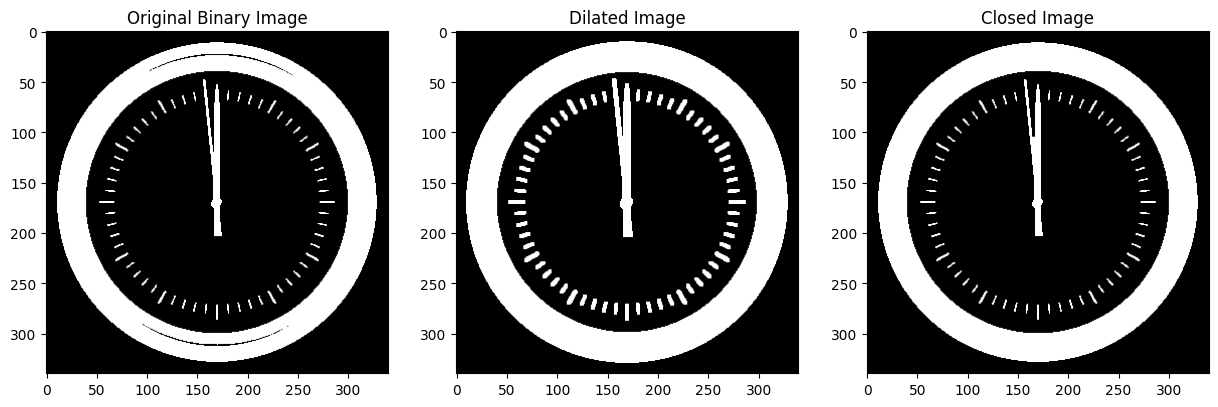

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def erode_image(binary_image, kernel):
    rows, cols = binary_image.shape
    kernel_size = kernel.shape[0]
    offset = kernel_size // 2
    eroded_image = np.zeros_like(binary_image)

    for i in range(offset, rows - offset):
        for j in range(offset, cols - offset):
            if np.all(binary_image[i - offset:i + offset + 1, j - offset:j + offset + 1] == 255):
                eroded_image[i, j] = 255

    return eroded_image

def dilate_image(binary_image, kernel):
    rows, cols = binary_image.shape
    kernel_size = kernel.shape[0]
    offset = kernel_size // 2
    dilated_image = np.zeros_like(binary_image)

    for i in range(offset, rows - offset):
        for j in range(offset, cols - offset):
            if binary_image[i, j] == 255:  # Check if the pixel is part of the foreground
                dilated_image[i - offset:i + offset + 1, j - offset:j + offset + 1] = 255

    return dilated_image


image = cv2.imread('/content/clock2.jpg')
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


_, binary_image = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)


kernel = np.ones((3, 3), np.uint8)


dilated_image = dilate_image(binary_image, kernel)
closed_image = erode_image(dilated_image, kernel)


plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(binary_image, cmap='gray')
plt.title('Original Binary Image')

plt.subplot(1, 3, 2)
plt.imshow(dilated_image, cmap='gray')
plt.title('Dilated Image')

plt.subplot(1, 3, 3)
plt.imshow(closed_image, cmap='gray')
plt.title('Closed Image')

plt.show()


closed_image contains the result of the closing operation, which is the binary image after performing the dilation followed by erosion.

**Boundary Extraction**

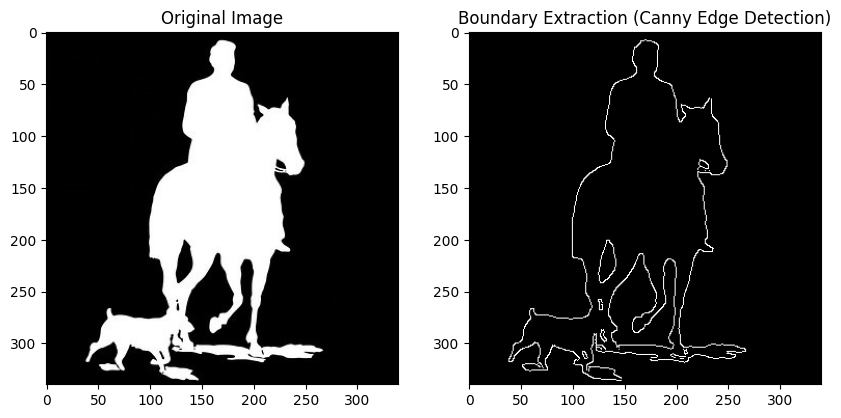

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


image = cv2.imread('/content/horse-dog.jpg')
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)


canny_image = cv2.Canny(blurred_image, 50, 150)


plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(canny_image, cmap='gray')
plt.title('Boundary Extraction (Canny Edge Detection)')

plt.show()


image = cv2.imread('/content/horse-dog.jpg'): This line loads the image "horse-dog.jpg" using OpenCV's imread function. The image is loaded as a 3-channel (BGR) color image.

gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY): This converts the loaded color image into a grayscale image. Grayscale images have only one channel, and each pixel value represents the intensity of the pixel, ranging from 0 (black) to 255 (white).

blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0): This line applies a Gaussian blur to the grayscale image. Gaussian blur is a low-pass filter that smooths an image by averaging the pixel values in the neighborhood of each pixel. The (5, 5) specifies the size of the kernel (a 5x5 matrix), and 0 indicates the standard deviation of the Gaussian kernel along the X and Y axes. A larger kernel size will result in stronger blurring.

canny_image = cv2.Canny(blurred_image, 50, 150): This line applies the Canny edge detection algorithm to the blurred image. The Canny algorithm is used to detect edges in an image. The 50 and 150 values are the lower and upper thresholds for the Canny edge detection. Pixels with gradients above the upper threshold are considered strong edges, while those with gradients below the lower threshold are suppressed. Pixels with gradients between the two thresholds are considered weak edges and are retained only if they are connected to strong edges.

The canny_image is the final result after applying the Canny edge detection to the blurred grayscale image. It will be a binary image, where white pixels represent edges, and black pixels represent the background. The Canny edge detection is commonly used as a preprocessing step for object detection, contour detection, and other computer vision tasks that involve identifying edges and boundaries in images.